This notebook is essentially divided in three parts. The first part is devoted to the importation of various sets of data in order to include exogeneous variables for predicting the temporal evolution of the COVID-19 pandemic. The second one consists in EDA by showing how the pandemic evolves in the most affected countries, with an emphasis of Italy, the most affected country. In the last part, I started to perform an auto-regressive linear regression model. Obviously, this work is in progress and will be updated regularly.

In [1]:
# import necessary modules
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import os
import warnings
#from datetime import datetime
from scipy import stats
from scipy.stats import norm, skew, probplot 
warnings.filterwarnings('ignore')

# 1. Data Importation

#### Read the csv files from kaggle.

In [75]:
global_data = pd.read_csv("C://Users//ENRISCOL//AAVsCovid//data//swiss_data.csv")
global_data[["icu_CH", "Date"]]

,icu_CH,Date
0,0.0,2020-02-25
1,0.0,2020-02-26
2,0.0,2020-02-27
3,0.0,2020-02-28
4,0.0,2020-02-29
5,0.0,2020-03-01
6,0.0,2020-03-02
7,0.0,2020-03-03
8,1.0,2020-03-04
9,1.0,2020-03-05


In [70]:
dftrain = pd.read_csv('C:/Users/ENRISCOL/AAVsCovid/data/JH/train.csv', parse_dates=['Date']).sort_values(by=['Country_Region', 'Date'])
dftest = pd.read_csv('C:/Users/ENRISCOL/AAVsCovid/data/JH/test.csv', parse_dates=['Date']).sort_values(by=['Country_Region', 'Date'])

In [77]:
dftrain

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,2020-01-26,0.0,0.0
5,6,NaN,Afghanistan,2020-01-27,0.0,0.0
6,7,NaN,Afghanistan,2020-01-28,0.0,0.0
7,8,NaN,Afghanistan,2020-01-29,0.0,0.0
8,9,NaN,Afghanistan,2020-01-30,0.0,0.0
9,10,NaN,Afghanistan,2020-01-31,0.0,0.0


#### Read the csv files on the Johns Hopkins CSSE database on github.

In [3]:
confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv').sort_values(by='Country/Region')#.set_index('Country/Region')
deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')#.set_index('Country/Region')
recovered = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')#.set_index('Country/Region') 

In [4]:
confirmed['Country_Region'] = confirmed['Country/Region']
confirmed['Province_State'] = confirmed['Province/State']
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,Country_Region,Province_State
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,24,40,40,74,84,94,110,110,Afghanistan,NaN
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,76,89,104,123,146,174,186,197,Albania,NaN
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,139,201,230,264,302,367,409,454,Algeria,NaN
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,88,113,133,164,188,224,267,308,Andorra,NaN
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,3,3,3,4,4,5,Angola,NaN


In [93]:
icu_CH =pd.read_csv("https://raw.githubusercontent.com/daenuprobst/covid19-cases-switzerland/master/covid19_icu_switzerland_openzh.csv")

#### Transpose the dataframes

In [95]:
icu_CH = icu_CH[["Date", "CH"]].rename(columns={"CH": "ConfirmedCases"})

,Date,ConfirmedCases
0,2020-02-25,0.0
1,2020-02-26,0.0
2,2020-02-27,0.0
3,2020-02-28,0.0
4,2020-02-29,0.0
5,2020-03-01,0.0
6,2020-03-02,0.0
7,2020-03-03,0.0
8,2020-03-04,1.0
9,2020-03-05,1.0


In [90]:
def transpose_df(df):
    df = df.drop(['Lat','Long'],axis=1).groupby('Country/Region').sum().T
    df.index = pd.to_datetime(df.index)#.date
    return df

In [97]:
confirmedT = transpose_df(confirmed)
deathsT = transpose_df(deaths)
recoveredT = transpose_df(recovered)
mortalityT = deathsT/confirmedT

confirmedT

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Zambia,Zimbabwe
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,4,0,...,0,0,0,0,0,0,2,0,0,0
2020-01-27,0,0,0,0,0,0,0,0,5,0,...,0,0,0,0,0,0,2,0,0,0
2020-01-28,0,0,0,0,0,0,0,0,5,0,...,0,0,0,0,0,0,2,0,0,0
2020-01-29,0,0,0,0,0,0,0,0,6,0,...,0,4,0,0,0,0,2,0,0,0
2020-01-30,0,0,0,0,0,0,0,0,9,0,...,0,4,0,0,0,0,2,0,0,0
2020-01-31,0,0,0,0,0,0,0,0,9,0,...,0,4,2,0,0,0,2,0,0,0


In [7]:
dftrain = dftrain.join(confirmed[['Country_Region', 'Province_State', 'Lat', 'Long']].set_index(['Province_State', 'Country_Region']), on=['Province_State', 'Country_Region'])#, how='outer')#.set_index(['Province_State', 'Country_Region']))

In [8]:
def add_day(df):
    df['Date'] = df.index
    df['Dayofyear'] = df['Date'].dt.dayofyear
    return df

In [9]:
dftrain['Dayofyear'] = dftrain['Date'].dt.dayofyear
dftest['Dayofyear'] = dftest['Date'].dt.dayofyear

In [10]:
allcountries = dftrain['Country_Region'].unique().tolist()

#### Compute the distance between all countries from the Haversine formula using their latitude and longitude.

In [11]:
from math import radians, cos, sin, asin, sqrt

def haversine(lat1, lon1, lat2, lon2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return c * r

In [12]:
list_countries = dftrain[dftrain['Date'] == '2020-01-22']['Country_Region'].tolist()
list_states = dftrain[dftrain['Date'] == '2020-01-22']['Province_State'].tolist()
#
df_distance = pd.DataFrame(index=[list_countries, list_states],columns=[list_countries, list_states])
df_distance.index.names = ['Country_Region', 'Province_State']
df_distance.columns.names = ['Country_Region', 'Province_State']
df_distance['Lat'] = dftrain[dftrain['Date'] == '2020-01-22']['Lat'].tolist()
df_distance['Long']  = dftrain[dftrain['Date'] == '2020-01-22']['Long'].tolist()
#
for country, state in list(zip(list_countries, list_states)):
    lat, lon = df_distance.loc[(country, state),['Lat', 'Long']]
    df_distance[(country, state)] = df_distance[['Lat', 'Long']].apply(lambda x: haversine(lat, lon, x[0], x[1]), axis=1)
#
df_distance.head()

Country_Region                 Afghanistan      Albania      Algeria  \
Province_State                         NaN          NaN          NaN   
Country_Region Province_State                                          
Afghanistan    NaN                0.000000  4032.954071  6001.829809   
Albania        NaN             4032.954071     0.000000  2227.062426   
Algeria        NaN             6001.829809  2227.062426     0.000000   
Andorra        NaN             5549.003559  1549.100043  1609.305432   
Angola         NaN             7005.675452  5826.484492  4699.099959   

Country_Region                     Andorra       Angola Antigua and Barbuda  \
Province_State                         NaN          NaN                 NaN   
Country_Region Province_State                                                 
Afghanistan    NaN             5549.003559  7005.675452        12085.762473   
Albania        NaN             1549.100043  5826.484492         8108.453022   
Algeria        NaN             1609.305432  4699.099959         6560.907727   
Andorra        NaN                0.000000  6200.429344         6563.046533   
Angola         NaN             6200.429344     0.000000         9297.902971   

Country_Region                    Argentina      Armenia  \
Province_State                          NaN          NaN   
Country_Region Province_State                              
Afghanistan    NaN             15396.415945  1943.325980   
Albania        NaN             12251.924000  2095.659770   
Algeria        NaN             10025.301159  4168.276650   
Andorra        NaN             11141.163935  3605.996200   
Angola         NaN              8499.833702  6351.869043   

Country_Region                                   Australia                  \
Province_State                Australian Capital Territory New South Wales   
Country_Region Province_State                                                
Afghanistan    NaN                            11583.324743    11666.674774   
Albania        NaN                            15571.755226    15679.423369   
Algeria        NaN                            16835.303396    17051.273179   
Andorra        NaN                            17118.308524    17215.170810   
Angola         NaN                            12718.664284    12986.232923   

Country_Region                  ...    United Kingdom               \
Province_State                  ...        Montserrat          NaN   
Country_Region Province_State   ...                                  
Afghanistan    NaN              ...      12140.211014  5719.930567   
Albania        NaN              ...       8163.050498  2335.695427   
Algeria        NaN              ...       6613.030048  3067.912661   
Andorra        NaN              ...       6617.662650  1475.426403   
Angola         NaN              ...       9329.906956  7665.748768   

Country_Region                      Uruguay   Uzbekistan     Venezuela  \
Province_State                          NaN          NaN           NaN   
Country_Region Province_State                                            
Afghanistan    NaN             14553.762823   932.256034  13286.686038   
Albania        NaN             11287.189036  3670.794017   9267.216505   
Algeria        NaN              9061.059324  5810.635084   7540.535697   
Andorra        NaN             10181.759769  5092.236126   7738.295866   
Angola         NaN              7814.736998  7549.731184   9546.459238   

Country_Region                      Vietnam       Zambia     Zimbabwe  \
Province_State                          NaN          NaN          NaN   
Country_Region Province_State                                           
Afghanistan    NaN              4702.637691  6647.360572  6967.328629   
Albania        NaN              8667.583167  6345.624430  6875.274553   
Algeria        NaN             10704.425063  5618.096430  6149.101332   
Andorra        NaN             10101.629210  6998.511724  7539.103654   
Angola         NaN 

#### Create dataframe listing the starting date of lockdowns.

In [13]:
from datetime import datetime
lockdown = confirmedT.copy()
lockdown.loc[:,:] = 0
country_lockdown = pd.DataFrame({
                    'Argentina' : datetime(2020,3,19), # 2020-03-19
                    'Australia' : datetime(2020,3,23), # 2020-03-23
                    'Austria' : datetime(2020,3,16), # 2020-03-16
                    'Belgium' : datetime(2020,3,18), # 2020-03-18
                    'Colombia' : datetime(2020,3,25), # 2020-03-25
                    'Czechia' : datetime(2020,3,16), # 2020-03-16
                    'Denmark' : datetime(2020,3,11), # 2020-03-11
                    'El Salvador' : datetime(2020,3,12), # 2020-03-12
                    'Fiji' : datetime(2020,3,9), # 2020-03-20
                    'France' : datetime(2020,3,17), # 2020-03-17
                    'Greece' : datetime(2020,3,23), # 2020-03-23
                    'Honduras' : datetime(2020,3,17), # 2020-03-17
                    'Ireland' : datetime(2020,3,12), # 2020-03-12
                    'Italy' : datetime(2020,3,9), # 2020-03-09
                    'Lebanon' : datetime(2020,3,15), # 2020-03-15
                    'Lithuania' : datetime(2020,3,16), # 2020-03-16
                    'Malaysia' : datetime(2020,3,18), # 2020-03-18
                    'Morocco' : datetime(2020,3,19), # 2020-03-19
                    'Philippines' : datetime(2020,3,15), # 2020-03-15
                    'Poland' : datetime(2020,3,13), # 2020-03-13
                    'Romania' : datetime(2020,3,25), # 2020-03-25
                    'South Africa' : datetime(2020,3,26), # 2020-03-26
                     'Switzerland' : datetime(2020,3,18), #2020-03-18
                    'Spain' : datetime(2020,3,14), # 2020-03-14
                    'Tunisia' : datetime(2020,3,22), # 2020-03-22
                    'United Kingdom' : datetime(2020,3,23), # 2020-03-23
                    'Venezuela' : datetime(2020,3,17), # 2020-03-17} 
                    },index=['Start Lockdown Country']).T
state_lockdown = pd.DataFrame({
                    ('US', 'California') : datetime(2020,3,19), # 2020-03-19
                    ('US', 'Nevada') : datetime(2020,3,20), # 2020-03-20
                    ('US', 'Connecticut') : datetime(2020,3,23), # 2020-03-23
                    ('US', 'Illinois') : datetime(2020,3,21), # 2020-03-21
                    ('US', 'Massachusetts') : datetime(2020,3,24), # 2020-03-24
                    ('US', 'Michigan') : datetime(2020,3,24), # 2020-03-24
                    ('US', 'New York') : datetime(2020,3,20), # 2020-03-20
                    ('US', 'Oregon') : datetime(2020,3,24), # 2020-03-24
                   },index=['Start Lockdown State']).T
state_lockdown.head()

Start Lockdown State
US California              2020-03-19
   Nevada                  2020-03-20
   Connecticut             2020-03-23
   Illinois                2020-03-21
   Massachusetts           2020-03-24

In [14]:
dftrainlockdown = dftrain.join(country_lockdown, on='Country_Region').join(state_lockdown, on=['Country_Region', 'Province_State'])
dftrainlockdown['Lockdown'] = 0
dftrainlockdown.loc[dftrainlockdown['Date'] > dftrainlockdown['Start Lockdown Country'],'Lockdown'] = 1
dftrainlockdown.loc[dftrainlockdown['Date'] > dftrainlockdown['Start Lockdown State'],'Lockdown'] = 1

#### Read csv file giving some useful information for all countries.

In [15]:
pop = pd.read_csv('C:/Users/ENRISCOL/AAVsCovid/data/JH/population_by_country_2020.csv').set_index('Country (or dependency)')
pop.sort_values(by='Country (or dependency)').head()

,Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
Country (or dependency),,,,,,,,,,
Afghanistan,38928346,2.33%,886592,60,652860,-62920.0,4.6,18,25%,0.50%
Albania,2877797,-0.11%,-3120,105,27400,-14000.0,1.6,36,63%,0.04%
Algeria,43851044,1.85%,797990,18,2381740,-10000.0,3.1,29,73%,0.56%
American Samoa,55191,-0.22%,-121,276,200,NaN,N.A.,N.A.,88%,0.00%
Andorra,77265,0.16%,123,164,470,NaN,N.A.,N.A.,88%,0.00%


#### Read csv file listing yearly number of airline passengers for each country.

#### Join all dataframes.

In [16]:
dftrainall = dftrain.join(pop, on='Country_Region')
dftrainall['Lockdown'] = dftrainlockdown['Lockdown']

dftrainall['Mortality'] = dftrainall['Fatalities']/dftrainall['ConfirmedCases']
dftrainall['ConfirmedCases_by_pop'] = dftrainall['ConfirmedCases']/dftrainall['Population (2020)']
dftrainall['ConfirmedCases_by_Km²'] = dftrainall['ConfirmedCases']/dftrainall['Land Area (Km²)']
#
dftrainall.tail()

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities,Lat,Long,Dayofyear,Population (2020),...,Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share,Lockdown,Mortality,ConfirmedCases_by_pop,ConfirmedCases_by_Km²
19693,29363,NaN,Zimbabwe,2020-03-24,3.0,1.0,-20.0,30.0,84,14862924.0,...,386850.0,-116858.0,3.6,19,38%,0.19%,0,0.333333,2.018445e-07,0.000008
19694,29364,NaN,Zimbabwe,2020-03-25,3.0,1.0,-20.0,30.0,85,14862924.0,...,386850.0,-116858.0,3.6,19,38%,0.19%,0,0.333333,2.018445e-07,0.000008
19695,29365,NaN,Zimbabwe,2020-03-26,3.0,1.0,-20.0,30.0,86,14862924.0,...,386850.0,-116858.0,3.6,19,38%,0.19%,0,0.333333,2.018445e-07,0.000008
19696,29366,NaN,Zimbabwe,2020-03-27,5.0,1.0,-20.0,30.0,87,14862924.0,...,386850.0,-116858.0,3.6,19,38%,0.19%,0,0.200000,3.364076e-07,0.000013
19697,29367,NaN,Zimbabwe,2020-03-28,7.0,1.0,-20.0,30.0,88,14862924.0,...,386850.0,-116858.0,3.6,19,38%,0.19%,0,0.142857,4.709706e-07,0.000018


# 2. EDA 

## 2.1 Data Importation of the daily-updated John Hopkins dataset

In [17]:
allcountries_ordered = confirmed.set_index(['Country_Region']).iloc[:,-2].sort_values(ascending=False).index.tolist()

In [18]:
confirmedT, deathsT, recoveredT, mortalityT = add_day(confirmedT), add_day(deathsT), add_day(recoveredT), add_day(mortalityT)

#### Create dataframes as function of days from "Day 1" of the epidemic, defined here as day when 100 cases have been confirmed in each country

In [19]:
def df_day1(df, confirmed):
    df_day1 = pd.DataFrame({'Days since 100 cases' : np.arange(1000)}).set_index('Days since 100 cases')
    countries_df = df.columns.tolist()[:-2]
    countries_conf = confirmed.columns.tolist()[:-2]
    #print(len(countries_df), len(confirmed.columns.tolist()[:-2]))
    for ic, country in enumerate(countries_df):
        for ic2, country2 in enumerate(countries_conf):
            if country == country2:
                dfsub = df[confirmed[country] > 100.][country]
                df_day1[country] = np.nan
                df_day1.loc[:len(dfsub)-1,country] = (dfsub).tolist()
        #try:
        #except:
        #    pass
    df_day1 = df_day1.dropna(how='all')
    #df_day1 = df_day1.fillna(0.)
    return df_day1


In [20]:
confirmed_day1 = df_day1(confirmedT, confirmedT)
deaths_day1 = df_day1(deathsT, confirmedT)
recovered_day1 = df_day1(recoveredT, confirmedT)
mortality_day1 = df_day1(mortalityT, confirmedT)
confirmednorm_day1 = confirmed_day1/confirmed_day1.loc[0,:]
maxday = confirmed_day1.shape[0]

In [21]:
date_day1 = confirmedT.copy()
for column in date_day1:
    date_day1[column] = confirmedT.index.tolist()
date_day1 = df_day1(date_day1, confirmedT)
date_day1.head()

,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Zambia,Zimbabwe
Days since 100 cases,,,,,,,,,,,,,,,,,,,,,
0,2020-03-27 00:00:00,2020-03-23 00:00:00,2020-03-21 00:00:00,2020-03-22 00:00:00,NaN,NaN,2020-03-20 00:00:00,2020-03-19 00:00:00,2020-03-10 00:00:00,2020-03-08 00:00:00,...,2020-03-25 00:00:00,2020-03-18 00:00:00,2020-03-05 00:00:00,2020-03-21 00:00:00,2020-03-28 00:00:00,2020-03-26 00:00:00,2020-03-22 00:00:00,NaN,NaN,NaN
1,2020-03-28 00:00:00,2020-03-24 00:00:00,2020-03-22 00:00:00,2020-03-23 00:00:00,NaN,NaN,2020-03-21 00:00:00,2020-03-20 00:00:00,2020-03-11 00:00:00,2020-03-09 00:00:00,...,2020-03-26 00:00:00,2020-03-19 00:00:00,2020-03-06 00:00:00,2020-03-22 00:00:00,NaN,2020-03-27 00:00:00,2020-03-23 00:00:00,NaN,NaN,NaN
2,NaN,2020-03-25 00:00:00,2020-03-23 00:00:00,2020-03-24 00:00:00,NaN,NaN,2020-03-22 00:00:00,2020-03-21 00:00:00,2020-03-12 00:00:00,2020-03-10 00:00:00,...,2020-03-27 00:00:00,2020-03-20 00:00:00,2020-03-07 00:00:00,2020-03-23 00:00:00,NaN,2020-03-28 00:00:00,2020-03-24 00:00:00,NaN,NaN,NaN
3,NaN,2020-03-26 00:00:00,2020-03-24 00:00:00,2020-03-25 00:00:00,NaN,NaN,2020-03-23 00:00:00,2020-03-22 00:00:00,2020-03-13 00:00:00,2020-03-11 00:00:00,...,2020-03-28 00:00:00,2020-03-21 00:00:00,2020-03-08 00:00:00,2020-03-24 00:00:00,NaN,NaN,2020-03-25 00:00:00,NaN,NaN,NaN
4,NaN,2020-03-27 00:00:00,2020-03-25 00:00:00,2020-03-26 00:00:00,NaN,NaN,2020-03-24 00:00:00,2020-03-23 00:00:00,2020-03-14 00:00:00,2020-03-12 00:00:00,...,NaN,2020-03-22 00:00:00,2020-03-09 00:00:00,2020-03-25 00:00:00,NaN,NaN,2020-03-26 00:00:00,NaN,NaN,NaN


## 2.2 COVID-19 evolution in the most affected countries in the world

#### Let's first plot the absolute number of new cases per day and deaths per day. Here, a rolling mean is used in order to smooth the curves as some data are updated every day.

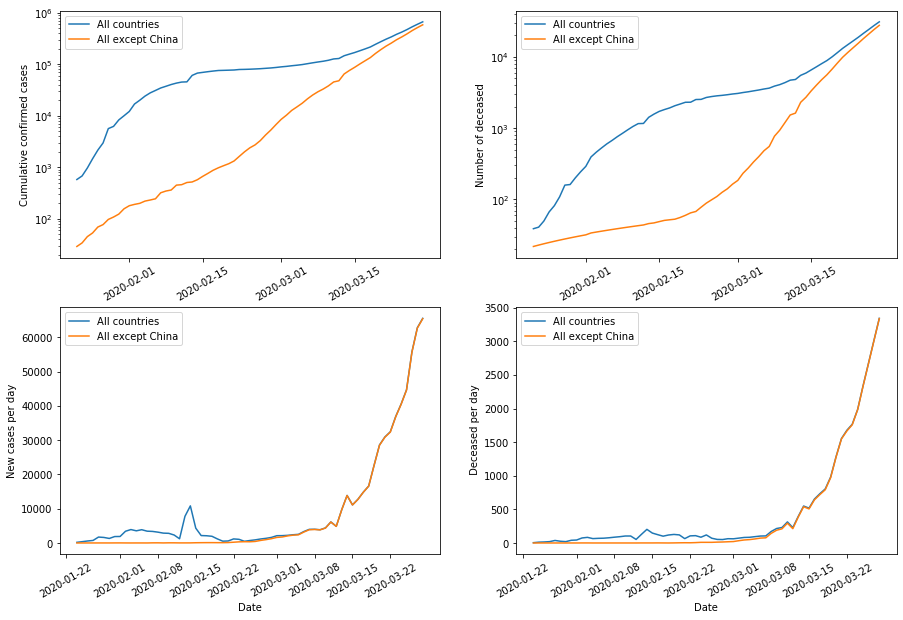

In [22]:
plt.figure(figsize=(15,10))
plt.subplots_adjust(wspace=0.2, hspace=0.2)
#
ylabels = ['Cumulative confirmed cases', 'Number of deceased', 'New cases per day',' Deceased per day']
ys = [[confirmedT.sum(axis=1),confirmedT.drop('China',axis=1).sum(axis=1)], 
    [deathsT.sum(axis=1),deathsT.drop('China',axis=1).sum(axis=1)],
    [confirmedT.sum(axis=1).diff().rolling(2).mean(),confirmedT.drop('China',axis=1).sum(axis=1).diff().rolling(2).mean()],
    [deathsT.sum(axis=1).diff().rolling(2).mean(),deathsT.drop('China',axis=1).sum(axis=1).diff().rolling(2).mean()],]
loglin = ['log', 'log', 'linear', 'linear']
for iy, y in enumerate(ys):
    plt.subplot(2,2,1+iy)
    plt.xticks(rotation=30)
    plt.xlabel('Date')
    plt.ylabel(ylabels[iy])
    plt.yscale(loglin[iy])
    for y2 in y:
        plt.plot(y2)
    plt.legend(['All countries', 'All except China'])
#
plt.show()

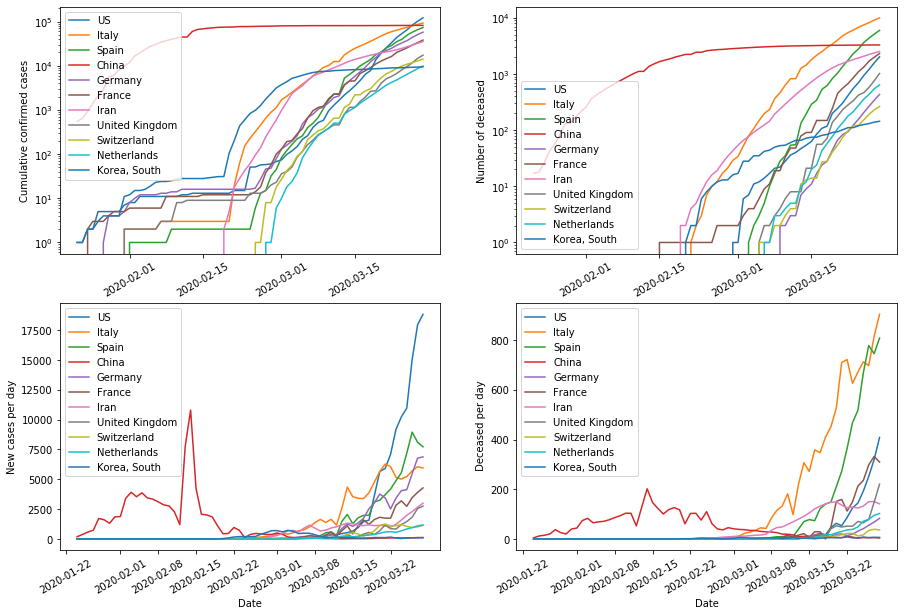

In [23]:
plt.figure(figsize=(15,10))
plt.subplots_adjust(wspace=0.2, hspace=0.2)
#
ylabels = ['Cumulative confirmed cases', 'Number of deceased', 'New cases per day',' Deceased per day']
ys = [confirmedT[allcountries_ordered[:11]], deathsT[allcountries_ordered[:11]],
    confirmedT[allcountries_ordered[:11]].diff().rolling(2).mean(), deathsT[allcountries_ordered[:11]].diff().rolling(2).mean()]
loglin = ['log', 'log', 'linear', 'linear']
for iy, y in enumerate(ys):
    plt.subplot(2,2,1+iy)
    plt.xticks(rotation=30)
    plt.xlabel('Date')
    plt.ylabel(ylabels[iy])
    plt.yscale(loglin[iy])
    plt.plot(y)
    plt.legend(allcountries_ordered[:11])
#
plt.show()

#### Let's now plot several variables as function of "Day 1" of the epidemic in each country, here defined as the day when 100 cases have been confirmed so we can directly compare the trend of all countries of interest. 

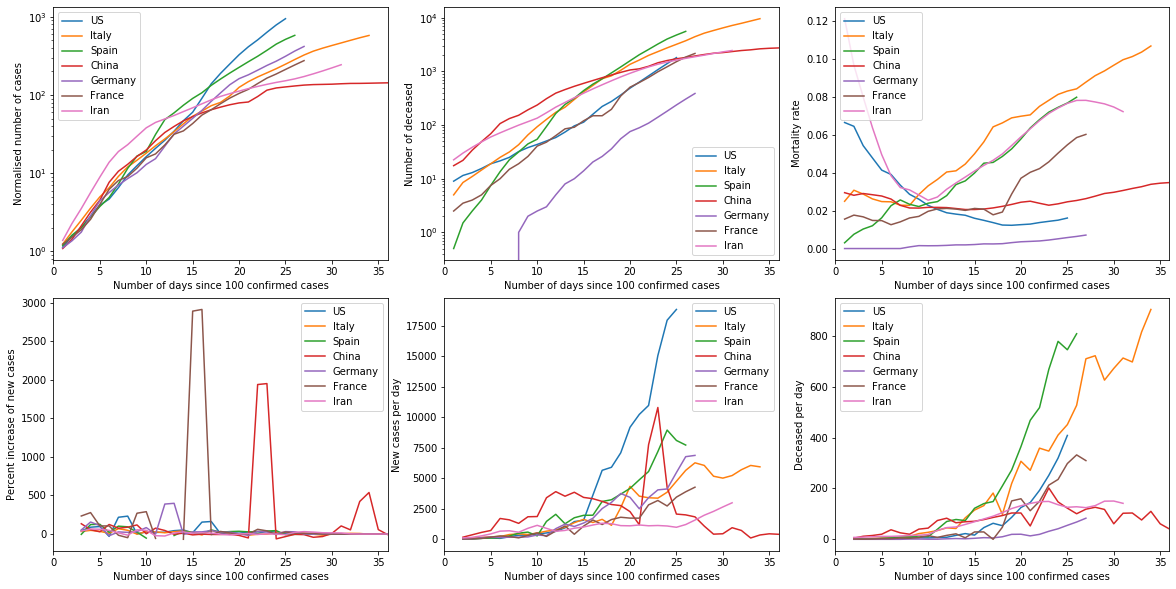

In [24]:
plt.figure(0,figsize=[20,10])
plt.subplots_adjust(wspace=0.17, hspace=0.15)
maxday = 35
#
ylabels = ['Normalised number of cases','Number of deceased','Mortality rate','Percent increase of new cases','New cases per day','Deceased per day']
ys = [confirmednorm_day1, deaths_day1, mortality_day1, confirmed_day1.diff().pct_change().rolling(1).mean()*100., confirmed_day1.diff(), deaths_day1.diff()]
loglin = ['log', 'log', 'linear', 'linear', 'linear', 'linear']
for iy, y in enumerate(ys):
    plt.subplot(2,3,iy+1)
    plt.xlabel('Number of days since 100 confirmed cases')
    plt.ylabel(ylabels[iy])
    plt.xlim(0,maxday+1)
    plt.yscale(loglin[iy])
    plt.plot(y[allcountries_ordered[:7]].rolling(2).mean())
    plt.legend(allcountries_ordered[:7])
#plt.show()
plt.savefig('cases_vs_day1.png',bbox_inches='tight',transparent=False)

## 2.3. COVID-19 in Italy

#### Define the italian regions of interest and read the csv files from the Italian Dipartimento della Protezione Civile on github.

In [25]:
#italy = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/covid19_italy_region.csv').set_index('Date')
#italy.index = pd.to_datetime(italy.index).date
list_regions = ['Total', 'Lombardia', 'Veneto', 'Piemonte', 'Emilia Romagna', 'Toscana', 'Campania', 'Sicilia']
urlitaly = 'https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni-'
dateini = datetime(2020,2,24)
datenow = datetime.now()
list_dates = pd.date_range(dateini, datenow).tolist()
dateitaly = ['%4s%2s%2s' % (str(date.year), str(date.month).zfill(2), str(date.day).zfill(2)) for date in list_dates[:-1]]
#
list_italy = []
for date in dateitaly:
    italy2 = pd.read_csv(urlitaly+date+'.csv').set_index('data')
    italy2.head()
    list_italy.append(italy2)
italy = pd.concat(list_italy)
italy.index = pd.to_datetime(italy.index).date
italy.head(5) 

,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_attualmente_positivi,nuovi_attualmente_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,note_it,note_en
2020-02-24,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,0,0,0,0,0,5,NaN,NaN
2020-02-24,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,0,0,0,0,0,0,NaN,NaN
2020-02-24,ITA,4,P.A. Bolzano,46.499335,11.356624,0,0,0,0,0,0,0,0,0,1,NaN,NaN
2020-02-24,ITA,18,Calabria,38.905976,16.594402,0,0,0,0,0,0,0,0,0,1,NaN,NaN
2020-02-24,ITA,15,Campania,40.839566,14.250850,0,0,0,0,0,0,0,0,0,10,NaN,NaN


In [26]:
italy_tot = italy.groupby([italy.index]).sum()
italy_tot['denominazione_regione'] = 'Total'
italy = italy.append(italy_tot)

#### Create variables of interest.

In [27]:
totalcases = [] ; totaldeaths = [] ; mortality = [] ; percentincrease = [] ; casesperday = [] ; deathsperday = [] 
for region in list_regions:
    italy2 = italy[italy['denominazione_regione'] == region]
    totalcases.append(italy2['totale_casi'])
    totaldeaths.append(italy2['deceduti'])
    mortality.append(italy2['deceduti']/italy2['totale_casi'])
    percentincrease.append(italy2['totale_casi'].pct_change().rolling(3).mean())
    casesperday.append(italy2['totale_casi'].diff())
    deathsperday.append(italy2['deceduti'].diff())

#### Let's now plot several variables as function of time. A rolling mean is used in order to smooth the data as some data are not updated every day.

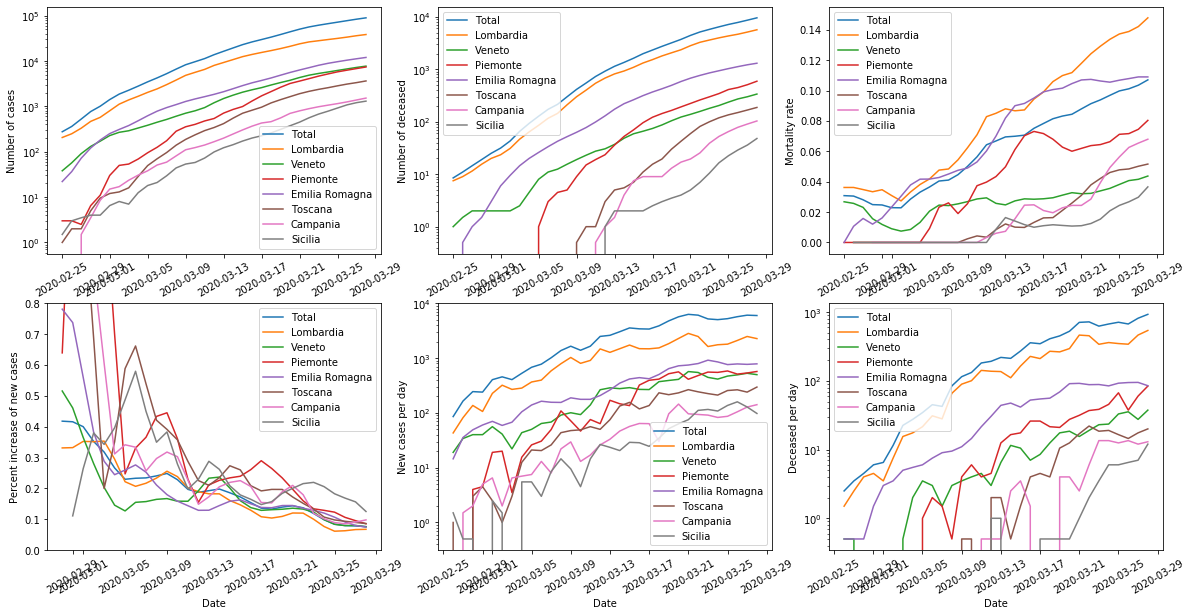

In [28]:
plt.figure(0,figsize=[20,10])
plt.subplots_adjust(wspace=0.17, hspace=0.2)
#
ylabels = ['Number of cases','Number of deceased','Mortality rate','Percent increase of new cases','New cases per day','Deceased per day']
ys = [totalcases, totaldeaths, mortality, percentincrease, casesperday, deathsperday]
loglin = ['log', 'log', 'linear', 'linear', 'log', 'log']
for iy, y in enumerate(ys):
    plt.subplot(2,3,iy+1)
    plt.xlabel('Date')
    plt.ylabel(ylabels[iy])
    if iy == 3:
        plt.ylim(0,0.8)
    plt.xticks(rotation=30)
    #plt.xlim(0,maxday)
    plt.yscale(loglin[iy])
    for region in y:
        plt.plot(region.rolling(2).mean()) #y.rolling(2).mean())
    plt.legend(list_regions)
#plt.show()
plt.savefig('cases_vs_time_italy.png',bbox_inches='tight',transparent=False)

# 3. ML modelling

Let's now model the temporal evolution of daily new cases for all countries. The approach is the following: 
- we first create an order of countries where the epidemic appears (defined as when 10 days are discovered); 
- for the first country (China), a simple auto-regressive model is used; 
- for other countries, we model the evolution of daily new cases by also taking into account the impact of total cases in countries where the epidemic appears first
- the impact of the epidemic of other countries is weighted by their distance between countries and the yearly number of flight passengers to include the "interaction" between two countries
- other variables, like lockdown starting day, will be used.

For now, a simple linear regression model is used to model 1) directly the total number of confirmed cases, 2) the number daily new cases, i.e. confirmed.diff() since this variable should be more stationary and therefore more easily modelled, 3) the number of daily new cases averaged within a year (with rolling(7).mean()) to smooth the data since some data are not updated every day.

In [29]:
def create_lags(df, maxshift):
    # Shifts
    shifts = np.arange(1,maxshift+1)
    # Create a dictionary of time-shifted data
    many_shifts = {'lag_{}'.format(ii): df.shift(ii) for ii in shifts}
    # Convert them into a dataframe
    many_shifts = pd.DataFrame(many_shifts).fillna(0.)
    return many_shifts

In [30]:
# Accuracy metrics
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    rmsle = np.sqrt(np.mean((np.log(forecast+1)-np.log(actual+1))**2))
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # Mean Absolute Percentage Error
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    #acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 'rmsle' : rmsle,
            'mpe': mpe, 'rmse':rmse, #'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

In [63]:
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
#
# define list of models and parameters
list_models = [('ElasticNet', ElasticNet()),
                ('ElasticNet_wdiff', ElasticNet()),
                ('ElasticNet_wdiffwrolling', ElasticNet())
               
              ]
#
list_params = [{'alpha' : np.logspace(-4,2,10),
                'l1_ratio' : np.array([0.6,0.7,0.8,0.9,1.])},
                {'alpha' : np.logspace(-4,2,10),
                'l1_ratio' : np.array([0.6,0.7,0.8,0.9,1.])},
                {'alpha' : np.logspace(-4,2,10),
                'l1_ratio' : np.array([0.6,0.7,0.8,0.9,1.])},
              ]

In [64]:
order_countries = date_day1.loc[0,:].sort_values().index.tolist()#[:11]
order_countries.remove('Diamond Princess')
order_countries = order_countries[:11]
order_countries = ["Switzerland"]

In [65]:
import xgboost as xgb
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
#
Nlags = 5
list_inpdate = ['Dayofyear']
list_rescv = ['params', 'mean_test_score', 'std_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score']
#
list_train_fc = [] ; list_valid_fc = [] ; list_train = [] ; list_valid = []
list_confirmed_train_fc = [] ; list_confirmed_valid_fc = [] ; list_confirmed_train = [] ; list_confirmed_valid = []
list_bestparams = [] ; list_bestest = [] ; list_cvres = [] ; list_inpfeat = [] ; list_error = []
df_error = pd.DataFrame(index=order_countries)
#
for im, model in enumerate(list_models): 
    list_bestparams2 = [] ; list_bestest2 = [] ; list_cvres2 = [] ; list_inpfeat2 = []
    list_train_fc2 = [] ; list_valid_fc2 = [] ; list_train2 = [] ; list_valid2 = []
    list_confirmed_train_fc2 = [] ; list_confirmed_valid_fc2 = [] ; list_confirmed_train2 = [] ; list_confirmed_valid2 = []
    list_error2 = [] ; list_index = []
    for ic, country in enumerate(order_countries): 
        print('Analyzing '+country+' with '+model[0])
        #
        # here the daily number of confirmed cases is used to make the TS more stationary, 
        # a rolling mean of 2 is also used to smooth the curves since some data are not updated on a daily basis
        inpfeature = list_inpdate + ['lag_'+str(i+1) for i in range(Nlags)] # + list_inpfeat 
        #
        if im == 0: # model directly the total number of confirmed cases
            dfcountry = confirmedT[[country, 'Dayofyear']].replace([np.inf, -np.inf], np.nan).dropna() 
        elif im == 1: # model the daily number of new confirmed cases
            dfcountry = confirmedT[[country, 'Dayofyear']].diff().rolling(1).mean().replace([np.inf, -np.inf], np.nan).dropna() 
        elif im == 2: # model the daily number of new confirmed cases averaged over a week (to smooth the data)
            dfcountry = confirmedT[[country, 'Dayofyear']].diff().rolling(7).mean().replace([np.inf, -np.inf], np.nan).dropna() 
        #
       
        
        dflag = create_lags(dfcountry[country], Nlags)
        masktrain =  dfcountry.index <= datetime(2020,3,15)
        datetrain, datevalid = dfcountry[masktrain].index[0], dfcountry[masktrain].index[-1] 
        dfconfirmedcountry = confirmedT[[country, 'Dayofyear']].replace([np.inf, -np.inf], np.nan).dropna() 
        confirmedstart = dfconfirmedcountry.loc[datetrain,country]
        confirmedend = dfconfirmedcountry.loc[datevalid,country]
        #
        # join all features
        dftrain2 = dflag[masktrain].join(dfcountry[masktrain])
        dfvalid2 = dflag[~masktrain].join(dfcountry[~masktrain])
        if ic > 0: # and im == 1
            inpfeature += order_countries[:ic]
            for ic2 in range(ic):
                dftrain2 = dftrain2.join(list_train2[ic2])
                dfvalid2 = dfvalid2.join(list_valid2[ic2])
        #
        # define training and validation sets
        X = dftrain2[inpfeature]#.drop(country, axis=1)
        y = dftrain2[country] 
        print(X)
        X_valid = dfvalid2[inpfeature]#.drop(country, axis=1)
        y_valid = dfvalid2[country]
        # 
        # run grid search
        param_search = list_params[im]
        tscv = TimeSeriesSplit(n_splits=5)
        gsearch = GridSearchCV(estimator=model[1],        # choice of model
                               cv=tscv,                   # choice of splitting
                               param_grid=param_search,   # grid of parameters
                               verbose=1,                 # print messages
                               return_train_score=True,   # return train score in CV grid result
                               n_jobs=-1,                 # number of CPUs to be used
                               scoring='neg_mean_squared_error' # metrics to be used
                              )
        gsearch.fit(X, y)
        #
        # save results
        list_bestparams2.append(gsearch.best_params_)
        list_bestest2.append(gsearch.best_estimator_)
        cvres = pd.DataFrame(gsearch.cv_results_)[list_rescv].sort_values(by='rank_test_score',ascending=True)
        list_cvres2.append(cvres)
        #print(cvres.head())
        print('Best-fit parameters: ',gsearch.best_params_,'\n \n')
        #
        # get the forecast TS
        #n_periods = len(valid.index)
        valid_fc = pd.Series(gsearch.predict(X_valid), index=X_valid.index) #gsearch.predict(X_valid) 
        train_fc = pd.Series(gsearch.predict(X), index=X.index) #gsearch.predict(X)
        #
        # save the forecast 
        list_train2.append(y) ; list_valid2.append(y_valid)
        list_train_fc2.append(train_fc) ; list_valid_fc2.append(valid_fc)
        list_inpfeat2.append(inpfeature)
        #
        # re-compute number of confirmed cases
        if im == 0: 
            list_confirmed_train2.append(y) ; list_confirmed_valid2.append(y_valid)
            list_confirmed_train_fc2.append(train_fc) ; list_confirmed_valid_fc2.append(valid_fc)
        elif im == 1: # 
            list_confirmed_train2.append(y.cumsum()+confirmedstart) ; list_confirmed_valid2.append(y_valid.cumsum()+confirmedend)
            list_confirmed_train_fc2.append(train_fc.cumsum()+confirmedstart) ; list_confirmed_valid_fc2.append(valid_fc.cumsum()+confirmedend)
        elif im == 2: 
            #ytrain = (confirmedT[[country, 'Dayofyear']].diff().dropna()).loc[:datetime.datetime(2020,3,15),country]
            #yvalid = (confirmedT[[country, 'Dayofyear']].diff().dropna()).loc[datetime.datetime(2020,3,15):,country]
            list_confirmed_train2.append(y.cumsum()+confirmedstart) ; list_confirmed_valid2.append(y_valid.cumsum()+confirmedend)
            list_confirmed_train_fc2.append(train_fc.cumsum()+confirmedstart) ; list_confirmed_valid_fc2.append(valid_fc.cumsum()+confirmedend)
        #
        # evaluate the error
        list_error2.append(forecast_accuracy(list_confirmed_valid_fc2[-1], list_confirmed_valid2[-1])['rmsle'])
        #list_index.append(storedept)

    #
    list_train.append(list_train2) ; list_valid.append(list_valid2)
    list_train_fc.append(list_train_fc2) ; list_valid_fc.append(list_valid_fc2)
    list_confirmed_train.append(list_confirmed_train2) ; list_confirmed_valid.append(list_confirmed_valid2)
    list_confirmed_train_fc.append(list_confirmed_train_fc2) ; list_confirmed_valid_fc.append(list_confirmed_valid_fc2)
    list_bestparams.append(list_bestparams2) ; list_bestest.append(list_bestest2) ; list_cvres.append(list_cvres2)
    list_inpfeat.append(list_inpfeat2)
    #
    df_error['RMSLE_'+model[0]] = list_error2 

Analyzing Switzerland with ElasticNet
            Dayofyear   lag_1   lag_2  lag_3  lag_4  lag_5
2020-01-22         22     0.0     0.0    0.0    0.0    0.0
2020-01-23         23     0.0     0.0    0.0    0.0    0.0
2020-01-24         24     0.0     0.0    0.0    0.0    0.0
2020-01-25         25     0.0     0.0    0.0    0.0    0.0
2020-01-26         26     0.0     0.0    0.0    0.0    0.0
2020-01-27         27     0.0     0.0    0.0    0.0    0.0
2020-01-28         28     0.0     0.0    0.0    0.0    0.0
2020-01-29         29     0.0     0.0    0.0    0.0    0.0
2020-01-30         30     0.0     0.0    0.0    0.0    0.0
2020-01-31         31     0.0     0.0    0.0    0.0    0.0
2020-02-01         32     0.0     0.0    0.0    0.0    0.0
2020-02-02         33     0.0     0.0    0.0    0.0    0.0
2020-02-03         34     0.0     0.0    0.0    0.0    0.0
2020-02-04         35     0.0     0.0    0.0    0.0    0.0
2020-02-05         36     0.0     0.0    0.0    0.0    0.0
2020-02-06        

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 125 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    5.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Best-fit parameters:  {'alpha': 100.0, 'l1_ratio': 0.6} 
 

Analyzing Switzerland with ElasticNet_wdiff
            Dayofyear  lag_1  lag_2  lag_3  lag_4  lag_5
2020-01-23        1.0    0.0    0.0    0.0    0.0    0.0
2020-01-24        1.0    0.0    0.0    0.0    0.0    0.0
2020-01-25        1.0    0.0    0.0    0.0    0.0    0.0
2020-01-26        1.0    0.0    0.0    0.0    0.0    0.0
2020-01-27        1.0    0.0    0.0    0.0    0.0    0.0
2020-01-28        1.0    0.0    0.0    0.0    0.0    0.0
2020-01-29        1.0    0.0    0.0    0.0    0.0    0.0
2020-01-30        1.0    0.0    0.0    0.0    0.0    0.0
2020-01-31        1.0    0.0    0.0    0.0    0.0    0.0
2020-02-01        1.0    0.0    0.0    0.0    0.0    0.0
2020-02-02        1.0    0.0    0.0    0.0    0.0    0.0
2020-02-03        1.0    0.0    0.0    0.0    0.0    0.0
2020-02-04        1.0    0.0    0.0    0.0    0.0    0.0
2020-02-05        1.0    0.0    0.0    0.0    0.0    0.0
2020-02-06        1.0    0.0    0.0    0.

[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Best-fit parameters:  {'alpha': 21.54434690031882, 'l1_ratio': 0.6} 
 

Analyzing Switzerland with ElasticNet_wdiffwrolling
            Dayofyear       lag_1       lag_2      lag_3      lag_4      lag_5
2020-01-29        1.0    0.000000    0.000000   0.000000   0.000000   0.000000
2020-01-30        1.0    0.000000    0.000000   0.000000   0.000000   0.000000
2020-01-31        1.0    0.000000    0.000000   0.000000   0.000000   0.000000
2020-02-01        1.0    0.000000    0.000000   0.000000   0.000000   0.000000
2020-02-02        1.0    0.000000    0.000000   0.000000   0.000000   0.000000
2020-02-03        1.0    0.000000    0.000000   0.000000   0.000000   0.000000
2020-02-04        1.0    0.000000    0.000000   0.000000   0.000000   0.000000
2020-02-05        1.0    0.000000    0.000000   0.000000   0.000000   0.000000
2020-02-06        1.0    0.000000    0.000000   0.000000   0.000000   0.000000
2020-02-07        1.0    0.000000    0.000000   0.000000   0.000000   0.000000
2020-02

[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    0.6s finished


#### List the RMSLE error for our different models.

In [66]:
df_error.head(10)

,RMSLE_ElasticNet,RMSLE_ElasticNet_wdiff,RMSLE_ElasticNet_wdiffwrolling
Switzerland,0.245254,0.556994,0.135275


#### Compare our forecast with actual evolution both for training and validation sets.

In [67]:
# Compare predicted and actual test TS
def plot_forecast(country, train, trainfc, valid, validfc, validfclower, validfcupper, plottitle):
    #fig, axes = plt.subplots(1, 1, figsize=(10,3), dpi=100, sharex=True)
    plt.xticks(rotation=15)
    plt.plot(train, label='Training set', color='C0')
    plt.plot(trainfc, label='Training set forecast', color='C0', ls='--')
    plt.plot(valid, label='Validation set', color='C1', ls='-')
    plt.ylabel('Confirmed cases')
    try:
        plt.fill_between(validfclower.index, 
                         validfclower, 
                         validfcupper, 
                         color='k', alpha=.15)
    except:
        pass
    plt.plot(validfc, label='Validation set forecast', color='C1', ls='--')
    plt.legend()
    plt.title("Forecast of "+str(country)+" with "+plottitle)
    #plt.show()

In [68]:
order_countries2 = order_countries[:11]

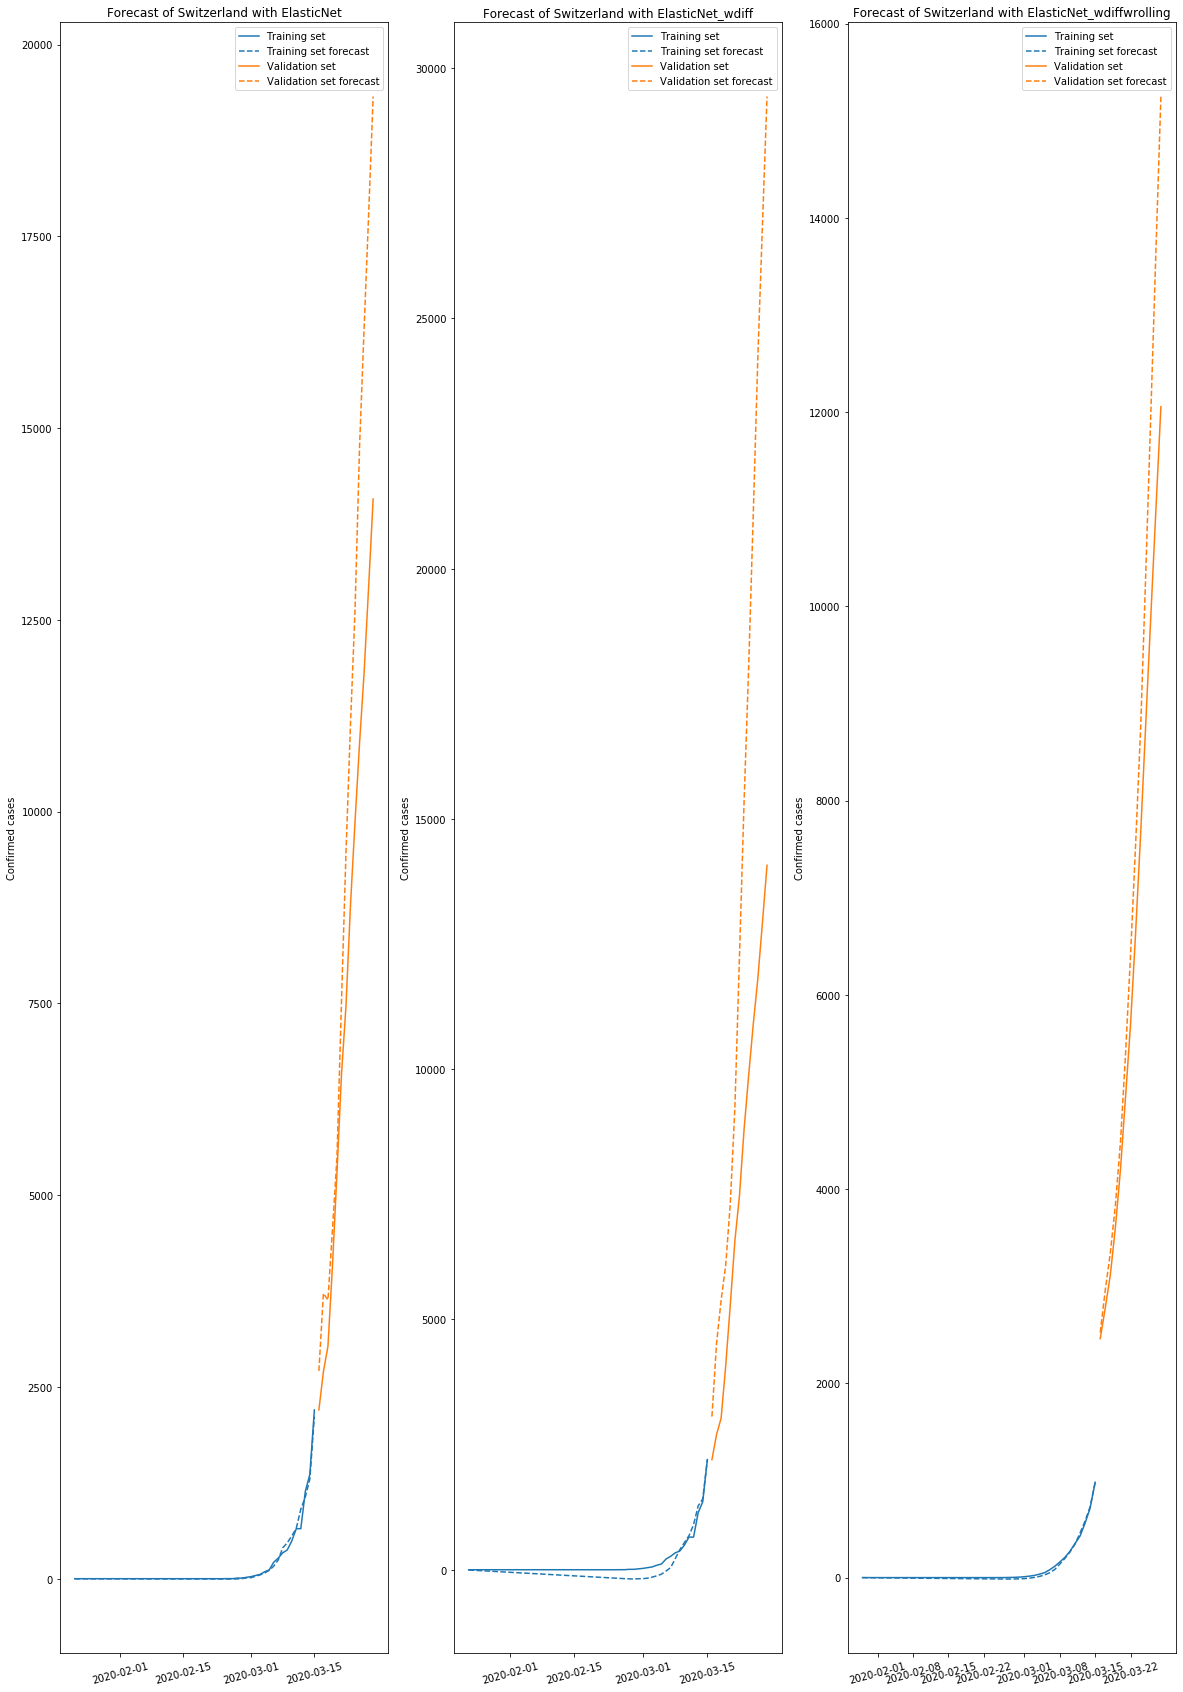

In [41]:
plt.figure(0,figsize=[20,30])
plt.subplots_adjust(wspace=0.2, hspace=0.45)
iy = 0
for ic, country in enumerate(order_countries2): #allcountries_ordered:
    for im, model in enumerate(list_models): 
        plt.subplot(len(order_countries2),len(list_models), iy+1)
        train = list_confirmed_train[im][ic] ; valid = list_confirmed_valid[im][ic]
        train_fc = list_confirmed_train_fc[im][ic] ; valid_fc = list_confirmed_valid_fc[im][ic]
        plot_forecast(country, train, train_fc, valid, valid_fc, 0., 0., model[0])
        iy += 1
plt.show()